<a href="https://colab.research.google.com/github/YuLim2/DataThon_BSSM/blob/master/sklearn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings("ignore")

path = '/content/drive/MyDrive/dataset/'

train = pd.read_csv(path + 'train.csv')
test = pd.read_csv(path + 'test.csv')
sample_submission = pd.read_csv(path + 'submit_sample.csv')
train.head()

,age,gender,height_cm,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,body fat_%
0,23.0,M,173.7,87.0,143.0,52.9,18.0,57.0,233.0,12.7
1,24.0,M,181.6,65.0,126.0,45.1,8.3,38.0,254.0,3.5
2,36.0,F,166.5,84.0,130.0,27.4,18.9,40.0,186.0,25.9
3,22.0,F,165.8,77.0,130.0,29.7,19.0,30.0,183.0,33.0
4,61.0,F,144.7,77.0,130.0,20.7,11.8,7.0,126.0,28.3


In [ ]:
print(train.shape)
print(test.shape)

(9375, 10)
(4018, 9)


In [ ]:
train['broad jump_cm'].value_counts()


220.0    128
230.0    126
211.0    124
180.0    110
200.0    108
        ... 
284.0      1
51.0       1
282.0      1
76.0       1
299.0      1
Name: broad jump_cm, Length: 235, dtype: int64

In [ ]:
#train.drop(['id'], axis = 1, inplace = True)
#test.drop(['id'], axis = 1, inplace = True)

discrete_names = ["gender"]
continuous_names = ["age" , "height_cm", "diastolic", "systolic", "gripForce", "sit and bend forward_cm", "sit-ups counts", "broad jump_cm"]

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9375 entries, 0 to 9374
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      9375 non-null   float64
 1   gender                   9375 non-null   object 
 2   height_cm                9375 non-null   float64
 3   diastolic                9375 non-null   float64
 4   systolic                 9375 non-null   float64
 5   gripForce                9375 non-null   float64
 6   sit and bend forward_cm  9375 non-null   float64
 7   sit-ups counts           9375 non-null   float64
 8   broad jump_cm            9375 non-null   float64
 9   body fat_%               9375 non-null   float64
dtypes: float64(9), object(1)
memory usage: 732.5+ KB


In [ ]:
train[train["body fat_%"].isnull()]

,age,gender,height_cm,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,body fat_%


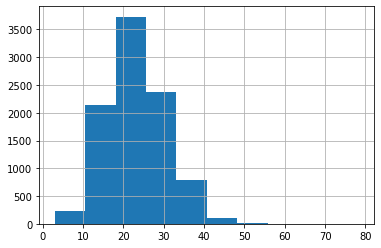

In [ ]:
train["body fat_%"].hist()

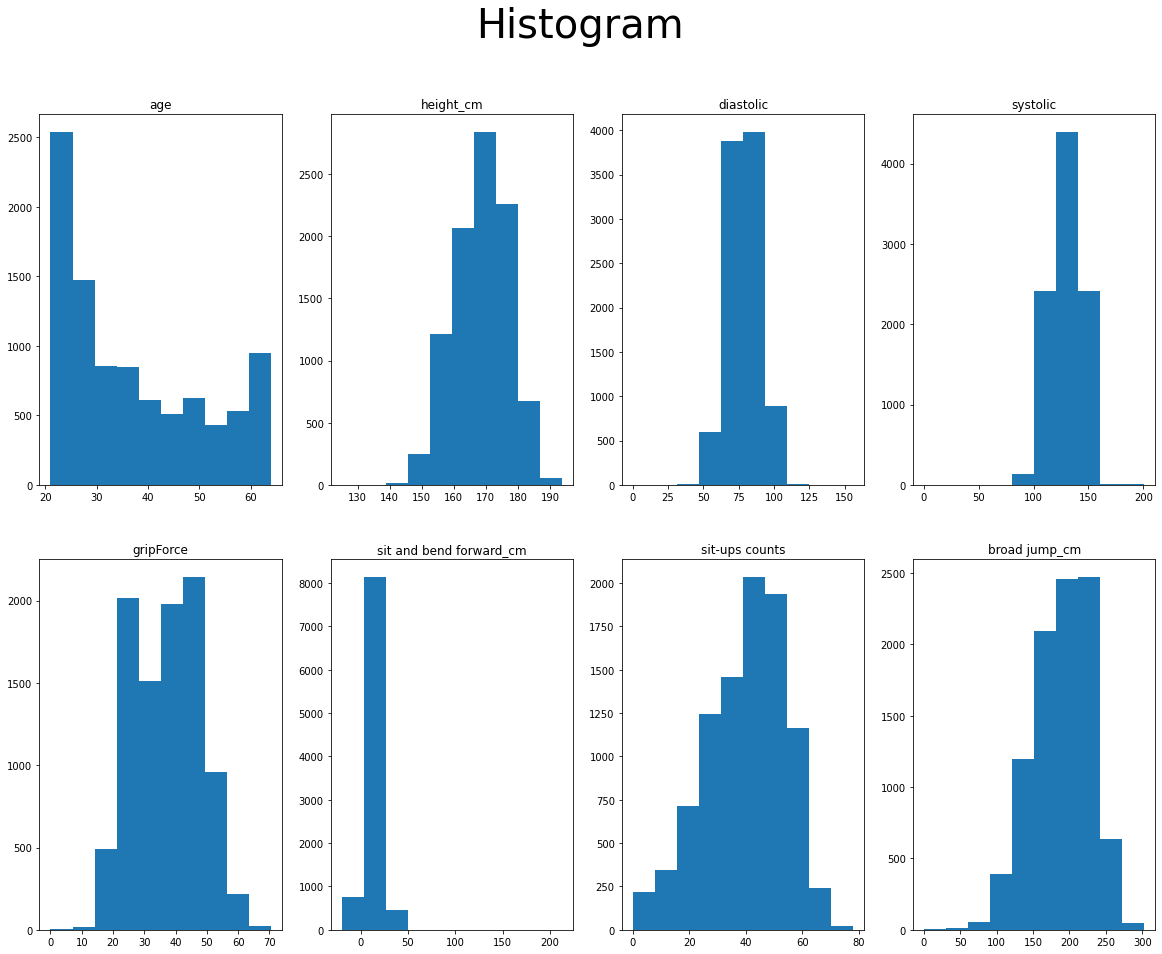

In [ ]:
plt.figure(figsize=(20,15))
plt.suptitle("Histogram", fontsize=40)

for i in range(len(continuous_names)):
    plt.subplot(2,4,i+1)
    plt.title(continuous_names[i])
    plt.hist(train[continuous_names[i]])

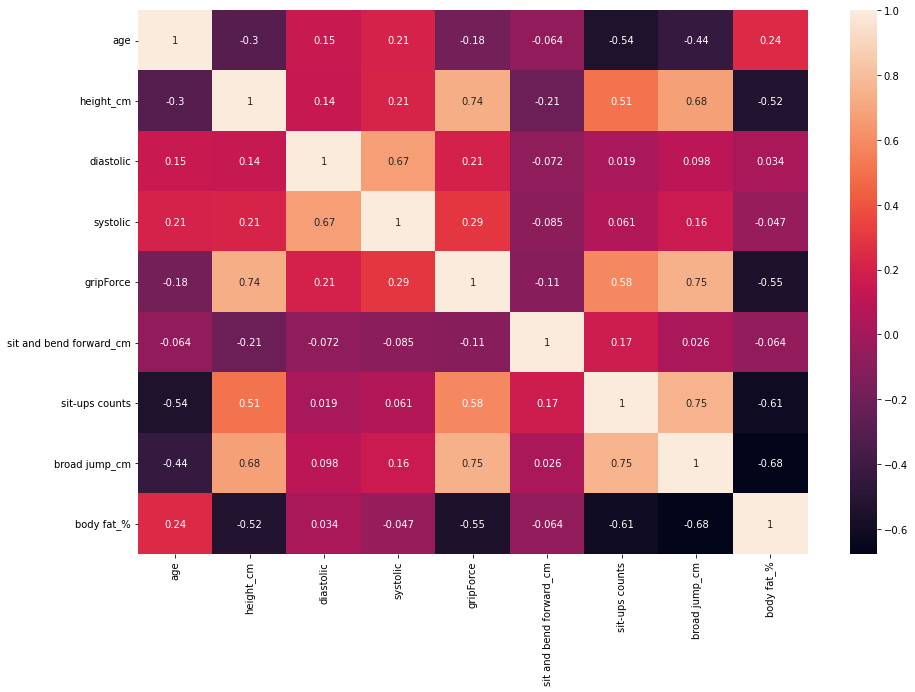

In [ ]:
plt.figure(figsize=(15,10))
ax = sns.heatmap(train.drop(discrete_names, axis = 1).corr(), annot=True)
plt.show()

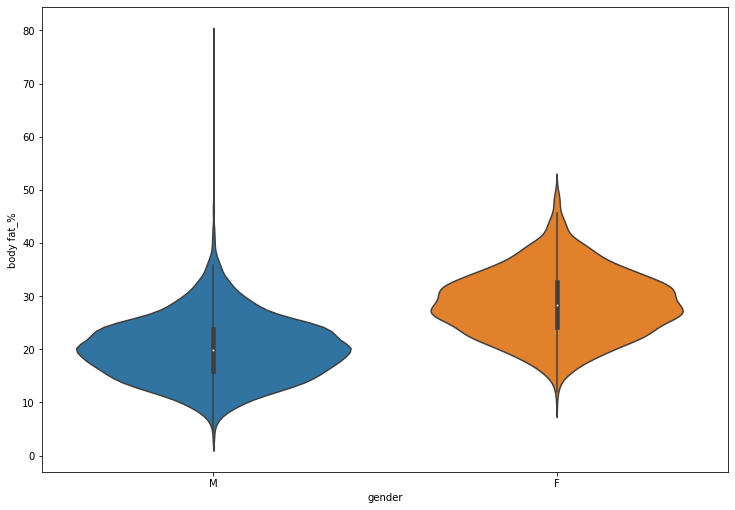

In [ ]:
plt.figure(figsize=(20,15))

for i in range(len(discrete_names)):
    plt.subplot(2,2,i+1)
    plt.xlabel(discrete_names[i])
    plt.ylabel('Body Mass (g)')
    sns.violinplot(x= train[discrete_names[i]], y= train['body fat_%'])
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [ ]:
train.fillna(train.mean(), inplace = True)
test.fillna(train.mean(), inplace = True)
train = pd.get_dummies(train)
test = pd.get_dummies(test)

print(train.shape)
print(test.shape)

(9375, 11)
(4018, 10)


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

train_scaler = scaler.fit_transform(train[continuous_names])
train[continuous_names] = pd.DataFrame(data=train_scaler, columns=continuous_names)

test_scaler = scaler.transform(test[continuous_names])
test[continuous_names] = pd.DataFrame(data=test_scaler, columns=continuous_names)

train[continuous_names].head()

,age,height_cm,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm
0,-1.017300,0.607924,0.756429,0.856821,1.494615,0.321704,1.208186,1.071876
1,-0.943974,1.544615,-1.288484,-0.300697,0.762383,-0.807248,-0.128137,1.597582
2,-0.064058,-0.245770,0.477578,-0.028340,-0.899221,0.426452,0.012529,-0.104703
3,-1.090627,-0.328768,-0.173076,-0.028340,-0.683307,0.438091,-0.690799,-0.179804
4,1.769101,-2.830565,-0.173076,-0.028340,-1.528190,-0.399894,-2.308454,-1.606719


In [ ]:
train_label = train['body fat_%']
train.drop(["body fat_%"], axis = 1, inplace = True)

In [ ]:
from sklearn.linear_model import Ridge
from sklearn import svm
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score

alphas = [0,0.1,1,10,100]

for alpha in alphas:
    ridge = Ridge(alpha=alpha)
    
    neg_mse_scores = cross_val_score(ridge, train, train_label, scoring = 'neg_mean_squared_error', cv = 5)
    avg_rmse = np.mean(np.sqrt(-neg_mse_scores))
    print('alpha 값 ', alpha, '일때 평균 rmse :', np.round(avg_rmse,4))

alpha 값  0 일때 평균 rmse : 4.9811
alpha 값  0.1 일때 평균 rmse : 4.9792
alpha 값  1 일때 평균 rmse : 4.9792
alpha 값  10 일때 평균 rmse : 4.9791
alpha 값  100 일때 평균 rmse : 4.9796


In [ ]:
from sklearn.linear_model import Ridge
from sklearn import svm
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score

alphas = [0,0.1,1,10,100]

for alpha in alphas:
    ridge = svm.SVR(C=alpha)
    
    neg_mse_scores = cross_val_score(ridge, train, train_label, scoring = 'neg_mean_squared_error', cv = 5)
    avg_rmse = np.mean(np.sqrt(-neg_mse_scores))
    print('alpha 값 ', alpha, '일때 평균 rmse :', np.round(avg_rmse,4))

alpha 값  0 일때 평균 rmse : nan
alpha 값  0.1 일때 평균 rmse : 5.0863
alpha 값  1 일때 평균 rmse : 4.9346
alpha 값  10 일때 평균 rmse : 4.9726
alpha 값  100 일때 평균 rmse : 5.1568


In [ ]:
from sklearn.linear_model import Ridge
from sklearn import svm
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score

alphas = [0,0.1,1,10,100]

for alpha in alphas:
    ridge = svm.SVR(C=alpha)
    
    neg_mse_scores = cross_val_score(ridge, train, train_label, scoring = 'neg_mean_squared_error', cv = 5)
    avg_rmse = np.mean(np.sqrt(-neg_mse_scores))
    print('alpha 값 ', alpha, '일때 평균 rmse :', np.round(avg_rmse,4))

In [ ]:
ridge = svm.SVR(C=1)
ridge.fit(train, train_label)
sample_submission["body fat_%"] = ridge.predict(test)

sample_submission.to_csv('my_submit.csv',index=False)